# PCA method for MNIST dataset

PCA is extensionally used for dimensionality reduction for the visualization of high dimensional data. We do dimensionality reduction to convert the high N-dimensional dataset into d-dimensional data where N>>d>2. 

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


# Steps of the method:

### 0 Data understanding 

WHAT ARE DIMENSIONS OF OUR DATA?

How many features (variables) data has?
e.g. labels of MNIST, height, width of flowers for iris etc...

### 1 Data preprocessing 

Before applying PCA we convert mean=0 and standard deviation =1 for each variable. 



In [2]:
from sklearn.preprocessing import StandardScaler

# load data 

data = pd.read_csv('mnist_train.csv')
print(data.head())

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)
print(standardized_data)

#label = data["label"]
labels =  data["label"] #label.head(15000)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         


# 2 Compute covariance matrix


In [3]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data
# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (785, 785)


# 3 Compute eigenvalue and eigenvector

Main idea here is to find top two eigen-values and corresponding eigen-vectors 
and then to project them onto a 2-Dim space.

Projecting the original data sample on the plane formed by two principal eigenvectors will be done by vector-vector multiplication.


Shape of eigen vectors = (785, 2)
Updated shape of eigen vectors =  (2, 785)


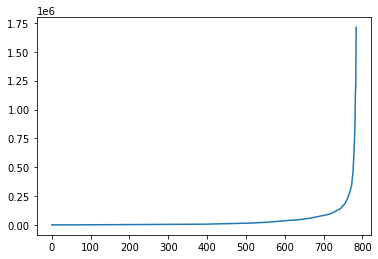

In [11]:

#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eigh.html
from scipy.linalg import eigh

# the parameter ‘eigvals’ is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.


values, vectors = eigh(covar_matrix)#, eigvals=(782,783))
#let us print eigenvalues
#print(values)
plt.plot(values)
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print("Shape of eigen vectors =" ,vectors.shape)


# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)
#print(vectors[0]) # vectors[0] represent the eigen vector corresponding 2nd principal eigen vector
#print(vectors[1]) # vectors[1] represent the eigen vector corresponding 1st principal eigen vector




In [9]:
print(values)

[1129518.04464767 1225738.95458121]


In [7]:
#Projecting the original data sample on the plane with two principal eigenvectors by vector-vector multiplication.
new_coordinates = np.matmul(vectors, sample_data.T) # Matrix product of two arrays

print(new_coordinates.shape)
print(labels.shape)

#Appending label to the 2d projected data(vertical stack) and creating a new data frame for plotting the labeled points.
new_coordinates = np.vstack((new_coordinates, labels)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

(2, 42000)
(42000,)
   1st_principal  2nd_principal  label
0      -3.834079       5.498016    1.0
1      -1.533175      -6.018994    0.0
2      -2.425707       1.959875    1.0
3      -2.284497      -5.716447    4.0
4      -1.153826      -6.049490    0.0


### Plotting

c:\users\lyubo\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


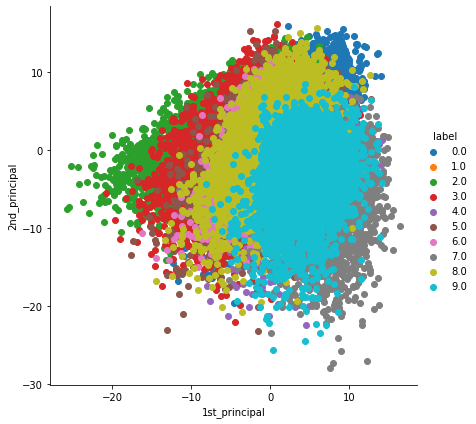

In [8]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# Using other standard methods 
Be careful to check all the steps are processed and correct with your data. 

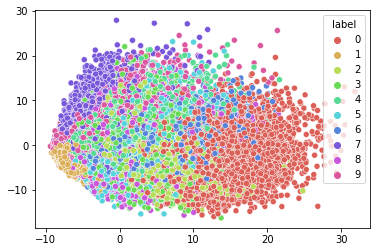

In [12]:
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');


# What do you see and are you happy with the results?
What can be distinguished more?

Which digits can be more distinguished?


# Test yourself

Now try to implement and apply 1-4 steps on:
1. your data (if applicable)
2. if not 1. try on iris dataset 